**In presentation, discuss:**
- why we do differential gene expression
- why network analysis is helpful to understand gene regulation
- how my project specifically benefits from this analysis (we can examine PP interactions that take place throughout mouse heart development)

### Check that cytoscape is connected

In [1]:
import CleanData as cda
import pandas as pd
import py4cytoscape as p4c
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.9.0',
 'automationAPIVersion': '1.3.0',
 'py4cytoscapeVersion': '0.0.11'}

### Import differential expression data and identify differentially expressed genes

In [2]:
male_data = 'FCGXXM-vs-FCGXYM-all-diffexp'
male_DEGs = cda.CleanData(male_data)

female_data = "FCGXYF-vs-FCGXXF-all-diffexp"
female_DEGs = cda.CleanData(female_data)

### ~~Query STRING database to build a network of protein-protein interactions using the differentially expressed genes.~~

In [ ]:
# string_query_male = 'string protein query query='+male_DEGs.genes_string()+' cutoff=0.4 species="Mus musculus" limit=150'
# p4c.commands_run(string_query_male)
# male_network_suid = p4c.get_network_suid()

# test_table = p4c.get_table_columns('node','display name')
# print(test_table)


# string_query_female = 'string protein query query='+female_DEGs.genes_string()+' cutoff=0.4 species="Mus musculus" limit=150'
# p4c.commands_run(string_query_female)
# female_network_suid = p4c.get_network_suid()

# test_table = p4c.get_table_columns('node','display name')
# print(test_table)

### Import STRING protein-protein interaction networks

In [3]:
p4c.sandbox_url_to("[MALE NETWORK DOWNLOAD LINK]", "female_network.cyjs")
p4c.import_network_from_file('female_network.cyjs')
female_network_suid = p4c.get_network_suid()

p4c.sandbox_url_to("[MALE NETWORK DOWNLOAD LINK]", 'male_network.cyjs')
p4c.import_network_from_file("male_network.cyjs")
male_network_suid = p4c.get_network_suid()

### Display the networks

10090: the NCBI taxonomy ID for *Mus musculus*    
ENSMUSP00000061095: the STRING database ID for a given protein (Kdm5d in this case)

style_name not specified, so updating "default" style.


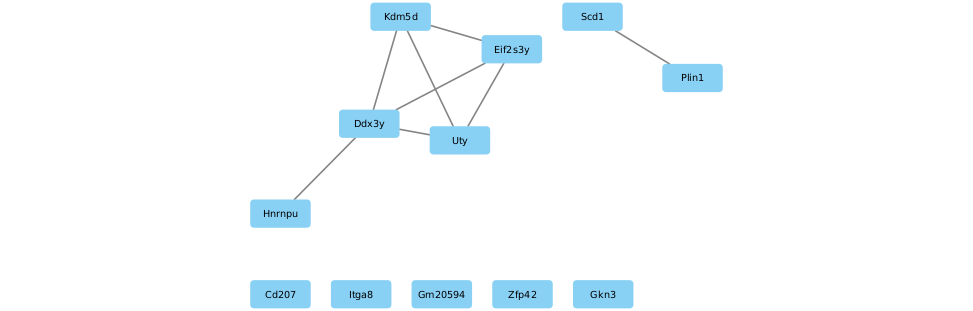

In [4]:
p4c.set_node_label_mapping(table_column='display_name', network=female_network_suid)
p4c.notebook_export_show_image(network=female_network_suid)

style_name not specified, so updating "default" style.


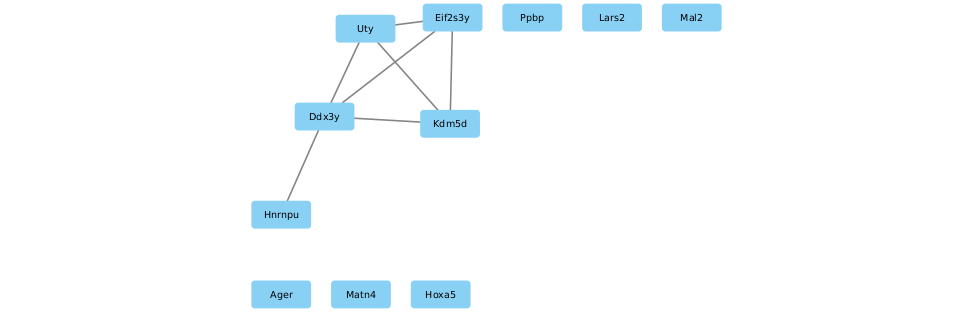

In [5]:
p4c.set_node_label_mapping(table_column='display_name', network=male_network_suid)
p4c.notebook_export_show_image(network=male_network_suid)

### Add log2 fold change and p-value data to each network's nodes

In [7]:
# Match mouse gene names in our dataset to mouse gene names in the network's table of nodes. Use the matched genes
# to add the appropriate log2foldchange and adjusted p-value data to each gene
female_lfc_padj = female_DEGs.reduce_data('geneNames', 'log2FoldChange', 'padj')
p4c.load_table_data(data=female_lfc_padj, data_key_column='geneNames', table='node', 
                    table_key_column='query_term', network=female_network_suid)

male_lfc_padj = male_DEGs.reduce_data('geneNames', 'log2FoldChange', 'padj')
p4c.load_table_data(data=male_lfc_padj, data_key_column='geneNames', table='node', 
                    table_key_column='query_term', network=male_network_suid)

/home/hannah/snap/jupyter/common/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


'Success: Data loaded in defaultnode table'

In [8]:
columns = ['display_name', 'query_term', 'geneNames', 'log2FoldChange', 'padj']
p4c.get_table_columns(table='node', columns=columns, network=female_network_suid)

,display_name,query_term,geneNames,log2FoldChange,padj
17688,Cd207,Cd207,Cd207,1.048171,0.033737
17691,Itga8,Itga8,Itga8,1.027566,0.030211
17694,Uty,Uty,Uty,4.660707,0.0
17697,Gm20594,Gm20594,Gm20594,-1.128146,0.015703
17700,Eif2s3y,Eif2s3y,Eif2s3y,4.311494,0.0
17703,Plin1,Plin1,Plin1,1.033993,0.016388
17706,Ddx3y,Ddx3y,Ddx3y,4.383144,0.0
17709,Zfp42,Tsix,Tsix,-1.592549,0.000136
17712,Scd1,Scd1,Scd1,1.531245,0.001094
17715,Gkn3,Gkn3,Gkn3,1.058908,0.044548


- In the Style tab of the Control Panel, switch the style from STRING style v1.5 to default in the drop-down at the top.
    - [DONE] Change the default node shape to ellipse
- check Lock node width and height.
- Set the default node fill color to light gray.
    - [DONE] Set the default node size to 40.
- Set the default Border Width to 2, and make the default Border Paint dark gray.
- For node Fill Color, create a continuous mapping for logFC, with the default ColorBrewer yellow-orange-red shades gradient.
- Finally, for Node Label, set a passthrough mapping for display name.
- Save your new visualization under Copy Style... in the Options menu of the Style interface, and name it de genes up.

### Color nodes based on log fold change

In [ ]:
# TODO: merge lfc and padj columns into p4c networks, then do color mapping based on lfc column

defaults = {'NODE_SHAPE': 'ellipse', 'NODE_SIZE': 40}
node_labels = map_visual_property(visual_prop='node label', table_column='display_name', mapping_type='p', 
                                  network=female_network_suid)
node_fills = map_visual_property('node fill color', 'Degree', 'd', ['1', '2'], ['#FF9900', '#66AAAA'])    # todo
edge_width = map_visual_property('edge width', 'EdgeBetweenness', 'p')    # todo
create_visual_style('log2foldchange', defaults=defaults, mappings=[node_labels, node_fills, edge_width])

From Wikipedia: "Force-directed graph drawing algorithms are a class of algorithms for drawing graphs in an aesthetically-pleasing way. Their purpose is to position the nodes of a graph in two-dimensional or three-dimensional space so that all the edges are of more or less equal length and there are as few crossing edges as possible"

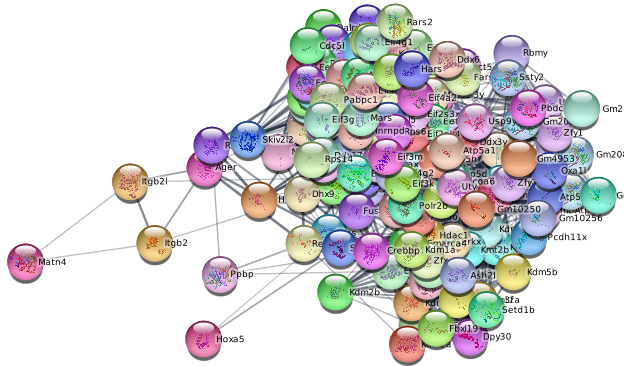

In [40]:
# Force the networks to look pretty. You can use either network suid or network name in the argument
# p4c.layout_network('circular', ovarian_suid)
p4c.layout_network('force-directed', female_subnetwork_suid)
p4c.layout_network('force-directed', male_subnetwork_suid)

In [9]:
p4c.get_table_column_names()

['SUID',
 'shared name',
 'stringdb::canonical name',
 'display name',
 'stringdb::full name',
 'stringdb::database identifier',
 'stringdb::description',
 '@id',
 'stringdb::namespace',
 'stringdb::node type',
 'query term',
 'stringdb::sequence',
 'stringdb::species',
 'stringdb::STRING style',
 'stringdb::enhancedLabel Passthrough',
 'compartment::cytoskeleton',
 'compartment::cytosol',
 'compartment::endoplasmic reticulum',
 'compartment::endosome',
 'compartment::extracellular',
 'compartment::golgi apparatus',
 'compartment::lysosome',
 'compartment::mitochondrion',
 'compartment::nucleus',
 'compartment::peroxisome',
 'compartment::plasma membrane',
 'stringdb::interactor score',
 'stringdb::structures',
 'tissue::adrenal gland',
 'tissue::blood',
 'tissue::bone',
 'tissue::bone marrow',
 'tissue::eye',
 'tissue::gall bladder',
 'tissue::heart',
 'tissue::intestine',
 'tissue::kidney',
 'tissue::liver',
 'tissue::lung',
 'tissue::muscle',
 'tissue::nervous system',
 'tissue::pan

In [8]:
print(data.df)

    index geneNames      baseMean  log2FoldChange     lfcSE       stat  \
0     458      Ager     22.092693        1.315639  0.264250   4.473211   
1    4561     Ddx3y    497.465575       -4.163370  0.269437 -15.384030   
2    5361   Eif2s3y    260.300392       -4.292619  0.266664 -15.240941   
3   15778   Gm29650      2.002712       -1.117940  0.280978  -4.930755   
4   26689     Hoxa5      7.805076        1.211460  0.265923   4.140435   
5   27857     Kdm5d    160.409316       -4.512303  0.259441 -13.326495   
6   28257     Lars2  29388.955493       -1.183901  0.226199  -5.533450   
7   28844      Mal2     16.513845        1.335363  0.266642   4.315821   
8   28981     Matn4     10.323542        1.240426  0.283728   4.156097   
9   29537   Mir6236   2528.458113       -1.618307  0.245479  -7.056001   
10  33728      Ppbp     15.563998        1.260736  0.285432   4.227972   
11  39854       Uty    213.918865       -4.504642  0.259827 -13.634464   
12  40590      Xist    939.625168     

STEP 1: build a regulatory network for females (XX vs XY) and for males (XX vs XY)
- FOR PPI: use the MusMusculus_binary_hq.txt file as the interaction network input (or download a different interaction network file from HINT: High quality INTeractomes)
    - you may have to reformat the file so that cytoscape will accept it
- FOR GRN: you'll need a list of raw gene expression data (which we have) and a list of transcription factors to use as hubs (which I can ask Nora for)

----------------------------------------------------------
- centrality analysis: which genes are hub genes?
- GO analysis: what families do DEGs belong to?

In [ ]:
# Do centrality analysis here

### Filter out unconnected nodes

No edges selected.
No edges selected.


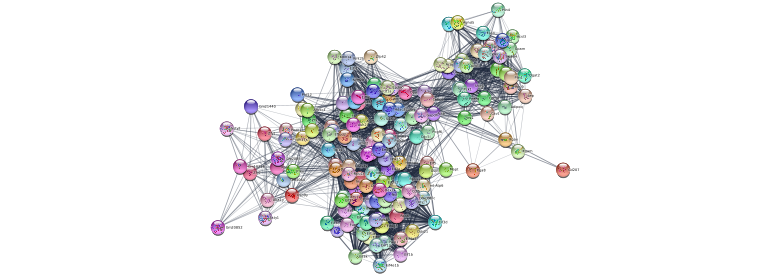

In [38]:
# select all nodes except low degree nodes, e.g., those with 0 edges
p4c.create_degree_filter('female degree filter', [0,0], predicate='IS_NOT_BETWEEN', network=female_network_suid)
p4c.create_degree_filter('male degree filter', [0,0], predicate='IS_NOT_BETWEEN', network=male_network_suid)

# create a subnetwork of the selected set of nodes and all relevant edges
p4c.create_subnetwork(subnetwork_name='female DEGs', network=female_network_suid)
p4c.create_subnetwork(subnetwork_name='male DEGs', network=male_network_suid)

# grab subnetwork suids
female_subnetwork_suid = p4c.get_network_suid('female DEGs')
male_subnetwork_suid = p4c.get_network_suid('male DEGs')

p4c.notebook_export_show_image(network=female_subnetwork_suid)

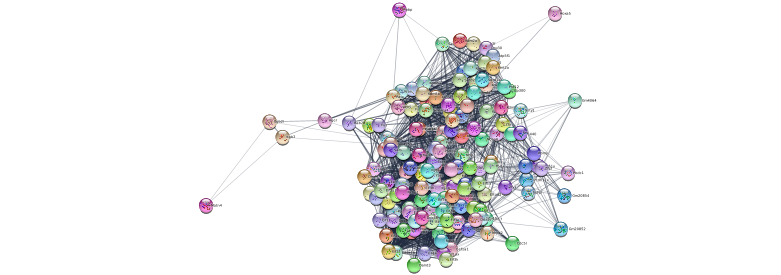

In [39]:
p4c.notebook_export_show_image(network=male_subnetwork_suid)

In [ ]:
# Do GO analysis here